### Традиционное АБ-тестирование

На веб-сайтах сегодня постоянно происходит проверка разного рода гипотез. Какой должна быть кнопка "Купить": красной или синей? Какой заголовок привлекает больше всего кликов к этой новостной статье? На какую версию рекламы больше кликают?

Чтобы определить оптимальный ответ на эти вопросы, используют A/B-тесты - статистически обоснованный метод сравнения версий A и B.

По сути, в ходе тестирования аналитик пытается определить, совпадают ли значения некой величины в группах А и В, или различие в ней на самом деле случайность?

**A/B-тестирование** основано на классическом понимании статистической значимости. Когда мы придумываем новую функциональность продукта, мы хотим проверить, полезна ли она, прежде чем запускать ее для всей пользовательской базы.

В тесте обычно участвуют две группы: группа, получающая новую функциональность, (Treatment) и контрольная группа (Control). Затем мы измеряем ключевой показатель для обеих групп, например:

* среднее время пребывания на сайте (социальная сеть),
* среднее время оформления заказа (электронная коммерция)
* CTR или кол-во кликов (онлайн-реклама).

Разница между группами проверяется на статистическую значимость.
Классический статистический тест при правильном проведении (например z-тест, t-тест) гарантирует, что количество ложных срабатываний(FPR или ошибок первого рода) не превышает $\alpha$ (часто берут 5%). Это означает, что при отсутствии разницы между экспериментальной и контрольной группой тест будет показывать значимое отличие не более чем в 5% случаев.

Сбалансированный A/B-тест распределяет равное количество трафика на каждую группу в течение всего времени эксперимента. Мы при этом не можем регулировать распределение трафика во время теста в зависимости от того, что наблюдается. По сути, недостаток A / B-тестирования очевиден: если экспериментальная группа явно превосходит результаты контрольной, нам все равно придется потратить много трафика на контрольную группу, чтобы получить статистическую значимость.

### А можно ли по-другому?

**Exploration vs Exploitation**

Представьте, что вы стоите в зале казино перед рядом загадочных игровых автоматов. Каждый из них — «однорукий бандит» — готов выдать вам случайный выигрыш, но вы не знаете, какой из них щедр, а какой скуп. Ваша задача — максимизировать суммарный выигрыш за ограниченное число попыток. Но как это сделать, если вы даже не знаете, с какими вероятностями выплачивают эти автоматы?  

Эта аллегория лежит в основе задачи о многоруком бандите (Multi-Armed Bandit, MAB), одной из ключевых проблем в области адаптивного принятия решений. Название, разумеется, метафорично: «руки» (arms) — это альтернативные варианты действий (например, медицинские методы лечения, варианты рекламных объявлений или настройки алгоритма), каждый из которых приносит случайную, изначально неизвестную награду. Ваша цель — научиться распределять ограниченные ресурсы (будь то бюджет, время или пациенты) между этими вариантами так, чтобы в итоге получить как можно больше «выигрыша».  

Классическое A/B-тестирование, даже в его байесовской форме, подходит к этой задаче довольно прямолинейно: сначала долго собирают данные, распределяя трафик равномерно между вариантами, и лишь потом, по итогам теста, выбирают победителя. Но что, если один из вариантов заведомо хуже? В таком подходе вы продолжаете вкладывать в него ресурсы до самого конца эксперимента, теряя потенциальную выгоду. MAB-алгоритмы решают эту проблему, отказываясь от жесткого разделения на фазу исследования и фазу эксплуатации. Вместо этого они учатся на лету, постепенно смещая фокус на более перспективные варианты, но при этом никогда полностью не отказываясь от исследования — вдруг текущий «лидер» на самом деле не оптимален, а вам просто повезло в первых нескольких попытках?  

Таким образом, задача MAB — это не просто оценка параметров (как в A/B-тестах), а *оптимизация процесса принятия решений в условиях неопределенности*. Алгоритмы многоруких бандитов должны балансировать между двумя противоречивыми целями: *исследовать* новые варианты, чтобы уточнить их потенциал, и *эксплуатировать* уже известные хорошие варианты, чтобы максимизировать немедленную отдачу - этот баланс известен как Exploration-Exploitation dilemma. Этот баланс делает MAB мощным инструментом в scenarios, где цена «слепого» тестирования высока, а среда может меняться со временем — будь то клинические испытания, онлайн-реклама или персонализированные рекомендации.  


### Формализация Залачи MAB

Мы для определенности будем считать, что каждый игровой автомат - показ определенного типа рекламного баннера, а стоимость кликов в баннер одинаковая. При этих условиях выигрыш от выбора каждого баннера будет случайной величиной Бернуллиевского типа вида  $X_i \sim reward \times Bernoulli(p_i)$ , где  $reward$  - стоимость клика в баннер, а  $p_i$  - неизвестная нам вероятность клика в $i$-тый баннер. На оптимизационную задачу наш постоянный коэффициент  $reward$  не повлияет, поэтому будем считать, что выигрыш это 0 или 1.

Бернуллиевский многорукий бандит может быть описан как пара $(A,R)$, где

* У нас есть $K$ вариантов (баннеров/ручек) с неизвестными вероятностями "выигрыша" $(\theta_1,...,\theta_K)$
* В каждый момент времени $t$ мы "дергаем за одну из ручек" (например для каждого приходящего пользователя принимаем решение, какой баннер ему показать) и получаем "выигрыш" $r$ (он может быть равен 0).
* $A$ - множество действий, которые мы предприняли (каждое действие - взаимодействие с одной из ручек бандита), В результате каждого действия $a$ мы получаем "выигрыш" $Q(a)$, причем $Q(a) = E(r|a) = \theta$. Если в результате действия $a_t$ в момент времени $t$ мы дернули за ручку $i$, то $Q(a_t) = \theta_i$
* $R$ - функция выигрыша. В нашем случае в каждый момент времени $t$ $r_t = R(a_t)$ равен 1, если человек кликнул в баннер, и это произойдет с вероятностью $Q(a_t) = \theta_i$, или равен 0, если человек в баннер не кликнул, и это произойдет с вероятностью $1 - \theta_i$


**Цель**

Наша задача состоит в том, чтобы максимизировать наш выигрыш за $T$ шагов, то есть:

$$maximize(\sum^T_{i=1}r_i)$$

Чтобы это сделать, нам нужно попытаться идентифицировать ручку с максимальным выигрышем $\theta^*$:

$$\theta^* = Q(a^*) = max_{a \in A}(Q(a)) = max_{1\le i \le K}(\theta_i)$$

Функция потерь (нашей ошибки), которая в этом случае возникает из-за неверно выбранной ручки, выглядит так:

$$ L_T = E(\sum^T_{i=1}(\theta^* - Q(a_t)))$$

### Основные стратегии

#### $\epsilon$-greedy

$\epsilon$-жадный алгоритм большую часть времени выбирает ручку, которая к настоящему моменту показала себя лучшей, но иногда выполняет случайное исследование новых ручек. Ценность каждого действия оценивается путем усреднения вознаграждений, связанных с целевым действием a, которые мы наблюдали до текущего временного шага t:

$$\hat Q_t(a) = \dfrac{1}{N_t(a)}\sum^t_{\tau = 1}r_t \mathbb{I}(a_t==a)$$

Здесь
* $\mathbb{I}$ - индикаторная функция, равная 1, если внутри истинное утверждение и 0, если ложное.
* $N_t(a)$ - количество раз, в которых было выбрано действие $a$.

Согласно $\epsilon$-жадному алгоритму с малой вероятностью $\epsilon$ мы предпринимаем случайное действие (выбираем случайную ручку), а с вероятностью $1 - \epsilon$ выбираем наилучшее на данный момент действие (оценивается по доле выигрышей).

#### Softmax

В отличие от ε-жадного подхода, где исследование происходит *равномерно* по всем рукам, стратегия **Softmax** (также известная как *Болтцмановское распределение*) реализует *взвешенное* исследование. Идея заключается в том, что вероятность выбора руки должна быть пропорциональна её текущей оценке: чем перспективнее рука выглядит, тем чаще её стоит проверять, но *никогда не исключая полностью* даже малоперспективные варианты. Это создает естественный баланс между эксплуатацией и целенаправленным исследованием.


1.  **Оценка ценности руки:** Как и в ε-жадном подходе, мы поддерживаем текущую оценку средней награды для каждой руки $a$:
$$
\hat{Q}_t(a) = \dfrac{1}{N_t(a)}\sum^{t}_{\tau=1} r_\tau \mathbb{I}(a_\tau = a)
$$
    Здесь:
   * $N_t(a)$ — количество выборов руки $a$ к моменту $t$
   * $\mathbb{I}$ — индикаторная функция.

2.  **Преобразование в вероятности:** Ключевое отличие Softmax — вычисление вероятности выбора руки $a$ на шаге $t$ по формуле **экспоненциального взвешивания**:
$$
    P_t(a) = \dfrac{\exp\left(\dfrac{\hat{Q}_t(a)}{\tau_t}\right)}{\sum_{b=1}^{K} \exp\left(\dfrac{\hat{Q}_t(b)}{\tau_t}\right)}
$$
    Здесь:
   * $\exp(\cdot)$ — экспоненциальная функция.
   * $\tau_t > 0$ — параметр **"температура"** (*temperature*), управляющий уровнем исследования.


Выбор температуры позволяет регулировать степень нашей заинтересованности в исследовании новых ручек:

*   **Высокая температура ($\tau_t \to \infty$):**  
    Экспоненты $\exp(\hat{Q}_t(a) / \tau_t)$ стремятся к 1 для всех рук. Знаменатель суммы становится равным $K \times 1 = K$. Вероятности выбора всех рук становятся **равномерными**: $P_t(a) = 1/K$. Алгоритм активно исследует все варианты.

*   **Низкая температура ($\tau_t \to 0^+$):**  
    Экспонента для руки с *максимальной* оценкой $\hat{Q}_t(a)$ будет значительно больше, чем для других. Её вероятность $P_t(a^*)$ стремится к 1, а вероятности остальных рук — к 0. Алгоритм **эксплуатирует** текущего лидера.

*   **Умеренная температура ($\tau_t > 0$):**  
    Руки с *более высокими* оценками $\hat{Q}_t(a)$ получают *более высокие* вероятности выбора. Руки с *низкими* оценками получают *ненулевые, но малые* вероятности. Это и есть **взвешенное исследование**: алгоритм чаще проверяет руки, которые выглядят перспективнее, но сохраняет шанс (пусть и небольшой) для проверки аутсайдеров — вдруг их начальные оценки были неудачной случайностью?


На практике $\tau_t$ часто **уменьшается** со временем (например, $\tau_t = 1 / \ln(t+1)$ или $\tau_t = c / \sqrt{t}$). Это реализует естественную эволюцию стратегии:
1.  **Вначале ($t$ мало, $\tau_t$ высоко):** Активное исследование всех рук для первичной оценки.
2.  **Со временем ($t$ растет, $\tau_t$ падает):** Фокус постепенно смещается в сторону рук с лучшими историческими показателями. Вероятности выбора субоптимальных рук плавно уменьшаются, но не исчезают полностью.

#### Upper Confidence Bounds (UCB)

Случайное исследование в предыдущей стратегии дает нам возможность как-то опробовать варианты, о которых мы ничего не знали. Тем не менее, из-за случайности, вероятно, что мы будем исследуем действие, которое себя плохо зарекомендовало в прошлом (скажем, у какой-то ручки доля кликов в 10 раз меньше остальных вариантов, а мы все равно продолжаем ее исследовать). Чтобы избежать такого малоэффективного исследования новых ручек, можно попробовать уменьшать параметр $\tau$ со временем, или можно попытаться оцифровать то, насколько достоверна наша текущая оценка вероятности выигрыша в конкретной ручке (если мы уже 125 раз дернули ручку А и она все время показывает себя хуже остальных, надо дергать ее пореже). Давайте будем дергать те ручки, относительно которых высока неопределенность нашей оценки, а те, относительно которых неопределенность мала(мы уверены в текущем измеренном результат), дергать будем реже. Другими словами, мы предпочитаем исследование тех ручек, у которых высок потенцил для получения оптимального выигрыша.

Алгоритм **Upper Confidence Bounds (UCB)** измеряет такой потенциал с помощью оценки сверху доверительной границы значения вознаграждения, которое мы можем с этой ручки получить. Обозначим эту оценку за $\hat U_t(a)$. Раз у нас оценка сверху то истинное значение с большой вероятностью должно находиться ниже нашего измеренного значения + наша оценка доверительной границы:

$$Q(a)\le \hat Q_t(a) + \hat U_t(a)$$

При этом оценка $\hat U_t(a)$ зависит от $N_t(a)$ (большее кол-во попыток должно уменьшать $\hat U_t(a)$, то есть наша оценка становится точнее.

В алгоритме UCB мы всегда выбираем такое действие, которое максимизирует нашу оценку:

$$a^{UCB}_t = argmax_{a \in A} \hat Q_t(a) + \hat U_t(a)$$

Остается понять, как нам, собственно, оценить $\hat U_t(a)$



Чтобы оценить нашу границу, не привязываясь к явному виду распределения, воспользуемся [неравенством Хёффдинга](http://cs229.stanford.edu/extra-notes/hoeffding.pdf). Это общее утверждение, которое справедливо для всех ограниченных вероятностных распределений (но мы его сформулируем для ограниченных на интервале $[0,1]$:

Пусть $X_1 ... X_t$ - независимые, одинаково распределенные случайные величины, каждая из которых находится в интервале $[0,1]$, тогда для любого $u > 0$ справедливо неравенство:

$$P(E[X] > \bar{X_t}+u) \le e^{-2tu^2} \text{ , где } \bar{X_t} = \dfrac{1}{t}\sum^t_{\tau = 1}X_{\tau}$$

Теперь переведем это утверждение на язык наших ручек и выигрышей. У нас:

* $r_t(a)$ - случайные величины из формулировки теоремы
* $Q(a)$ - истинное значение среднего (вероятность выигрыша)
* $\hat Q_t(a)$ - выборочная оценка среднего на шаге $t$(вероятность выигрыша, оцененная по выборке)
* $u = \hat U_t(a)$ - наша оценка $UCB$

Значит для нашего бандитского эксперимента оценка примет вид:

$$P(Q(a) > \hat Q_t(a) + \hat U_t(a)) \le e^{-2t(\hat U_t(a))^2}$$

Мы хотим выбрать границу так, чтобы с большой вероятностью истинное среднее оказывалось меньше, чем сумма выборочной оценки и оценки $UCB$. Таким образом вероятность $e^{-2t(\hat U_t(a))^2}$ должна быть маленькой величиной. Допустим, это какая-то маленькая вероятность $p$, тогда:

$$e^{-2t(\hat U_t(a))^2} = p \text{ или, иначе говоря:}$$

$$U_t(a) = \sqrt{\dfrac{-\log p}{2N_t(a)}}$$


Если $p = t^{-4}$, тогда мы получим:

$$U_t(a) = \sqrt{\dfrac{2logt}{N_t(a)}}$$

$$a^{UCB1}_t = argmax_{a \in A} \hat Q_t(a) + \sqrt{\dfrac{2logt}{N_t(a)}}$$

Такая оценка называется  **UCB1**

Но в таком выводе мы не делаем никаких предположений о распределении вознаграждения, и поэтому приходится полагаться на общую оценку через неравенство Хёффдинга. Если мы сможем заранее узнать распределение, границы можно будет оценить лучше.

Например, если мы ожидаем, что среднее вознаграждение каждого игрового автомата можно приблизить нормальным, мы можем установить верхнюю границу как 95% доверительный интервал, установив $\hat U_t(a)$ равным  удвоенному или утроенному стандартному отклонению (то самое правило двух/трех сигм) Бета-распределения для указанного бандита (для каждого считаем количество успехов и не-успехов - они и будут параметрами нашего распределения).

Если наши выигрыши распределены по Бернулли(а это так и есть), теорема Байеса нам подсказывает, что априорное и апостериорное распределения для оцениваемых параметров можно выбрать в виде Бета-распределения. Тогда при появлении новых данных мы будем обновлять параметры апостериорного распределения и точнее угадывать нужную нам ручку. Про обновление параметров бета-распределения хорошо почитать в [этой](https://arxiv.org/pdf/1709.03162.pdf) статье.

Такое решение называется **Байесовской UCB** и имеет вид:
$$a^{Bayes\ UCB}_t = argmax_{a \in A} \hat Q_t(a) + 2\sigma(Beta_a)$$

#### Thompson Sampling

На каждом временном шаге в этом методе мы хотим выбирать действие a в соответствии с вероятностью того, что оно является оптимальным. Оценивается это так:

$$\pi(a|h_t) = P[Q(a) > Q(a'), \forall a' \not = a|h_t] = E_{R|h_t}[1(a= argmax_{a \in A}Q(a))]$$

Здесь $\pi(a|h_t)$ - вероятность принятия решения $a$ при условии истории $h_t$ - набора предыдущих действий.

Для Бернуллиевского бандита логичным(как и в предыдущем случае) кажется моделировать $Q(a)$ с помощью бета-распределения, так как $Q(a)$ есть неизвестное $\theta$ для распределения Бернулли. Значение $Beta(\alpha,\beta)$ находится в интервале $[0,1]$, $\alpha$ и $\beta$ соответствуют количеству "успехов"(когда мы получили выигрыш) и "неудач"(когда мы не получили выигрыш) соответственно.

Инициализируем параметры $\alpha$ и $\beta$ нашего бета-распределения на основе некоторых априорных знаний или убеждений для каждой ручки, например:

* При $\alpha = 1$ и $\beta = 1$ мы ожидаем вероятность выигрыша 50%, но при этом не очень уверены.
* При $\alpha = 1000$ и $\beta = 9000$ мы крайне уверены, что вероятность выигрыша составляет 10%

В каждый момент времени $t$ мы сэмплируем ожидаемый выигрыш $\hat Q_t(a)$ из априорного бета-распределения $Beta(\alpha_i,\beta_i)$ для каждого действия. Лучшее действие выбирается среди вариантов $a^{TS}_t = argmax_{a \in A}\hat Q(a)$. Затем мы получаем истинное значение выигрыша, и можем соответствующим образом обновить бета-распределение, которое по сути делает байесовский вывод для вычисления апостериорного значения с известным априорным значением и правдоподобием получения выборочных данных.

$\alpha_i \leftarrow \alpha_i + r_t \mathbb{I}(a^{TS}_t==a)$

$\beta_i \leftarrow \beta_i + (1-r_t)\mathbb{I}(a^{TS}_t==a)$

Получаемые нами оценки вознаграждения $\hat Q(a)$ сэмплируются из апостериорных распределений, каждая из получаемых вероятностей эквивалентна вероятности того, что соответствующее действие является оптимальным при условии наблюдаемой истории.

### Реализация

#### Общий класс для бандита

In [1]:
import time
import numpy as np
from scipy.stats import beta

# Общий класс для Бернуллиевских бандитов
class BernoulliBandit():

    def __init__(self, n, probas=None):
        assert probas is None or len(probas) == n

        # Кол-во ручек
        self.n = n

        if probas is None:
            np.random.seed(int(time.time()))
            # Истинные вероятности ручек (случайно заданные)
            self.probas = [np.random.random() for _ in range(self.n)]
        else:
            # Истинные вероятности ручек, если заданы в функции
            self.probas = probas

        # Вероятность оптимальной ручки
        self.best_proba = max(self.probas)

    def generate_reward(self, i):
        # Генерация "выигрыша" для i-той ручки бандита
        if np.random.random() < self.probas[i]:
            return 1
        else:
            return 0

#### Класс для стратегии решения задачи бандита

In [3]:
# Класс для имплементации решения проблемы с бандитами

class Solver(object):
    def __init__(self, bandit):
        """
        bandit (Bandit): Инициализация бандита.
        """
        assert isinstance(bandit, BernoulliBandit)
        np.random.seed(int(time.time()))

        self.bandit = bandit

        self.counts = [0] * self.bandit.n
        self.actions = []  # Список id ручек от 0 до bandit.n-1.
        self.regret = 0.  # Суммарная ошибка.
        self.regrets = [0.]  # История суммарной ошибки.
        self.reward = 0. # Суммарный выигрыш.
        self.rewards = [0.] # История суммарного выигрыша.

    def update_regret(self, i):
        # i (int): Индекс выбранной ручки.
        self.regret += self.bandit.best_proba - self.bandit.probas[i]
        self.regrets.append(self.regret)

    def update_reward(self, i):
        # i (int): Индекс выбранной ручки.
#         self.reward += self.bandit.best_lambda_EV - 1/self.bandit.lambdas[i]
        self.rewards.append(self.reward)

    # Dummy-метод оценки вероятностей (переопределяется для каждого solver'a)
    @property
    def estimated_probas(self):
        raise NotImplementedError

    # Dummy-метод перехода на следующий шаг (переопределяется для каждого solver'a)
    def run_one_step(self):
        """Return the machine index to take action on."""
        raise NotImplementedError

    # Запуск работы бандита на num_steps шагов
    def run(self, num_steps):
        assert self.bandit is not None
        for _ in range(num_steps):
            i = self.run_one_step()

            self.counts[i] += 1
            self.actions.append(i)
            self.update_regret(i)
            self.update_reward(i)

#### $\epsilon$-жадная стратегия

In [4]:
class EpsilonGreedy(Solver):
    def __init__(self, bandit, eps, initial_proba=1.0):
        """
        eps (float): Вероятность исследования случайной ручки.
        init_proba (float): начальное значение =  1.0;
        """
        # Сделали бандита
        super(EpsilonGreedy, self).__init__(bandit)

        assert 0. <= eps <= 1.0
        # Задали epsilon
        self.eps = eps

        self.estimates = [initial_proba] * self.bandit.n  # Оптимистичная инициализация

    @property
    def estimated_probas(self):
        return self.estimates

    def run_one_step(self):
        if np.random.random() < self.eps:
            # Дернули случайную ручку
            i = np.random.randint(0, self.bandit.n)
        else:
            # Выбрали наилучшую (на данный момент) ручку
            i = max(range(self.bandit.n), key=lambda x: self.estimates[x])

        r = self.bandit.generate_reward(i)

        self.reward += r

        # Оценка для i-того бандита обновляется
        self.estimates[i] += 1. / (self.counts[i] + 1) * (r - self.estimates[i])

        return i

#### UCB1 стратегия

In [5]:
class UCB1(Solver):
    def __init__(self, bandit, initial_proba=1.0):
        super(UCB1, self).__init__(bandit)
        self.t = 0
        self.estimates = [initial_proba] * self.bandit.n

    @property
    def estimated_probas(self):
        return self.estimates

    def run_one_step(self):
        self.t += 1

        # Выбрать лучшую ручку с учетом UCB.
        i = max(range(self.bandit.n), key=lambda x: self.estimates[x] + np.sqrt(
            2 * np.log(self.t) / (1 + self.counts[x])))
        r = self.bandit.generate_reward(i)

        self.reward += r

        self.estimates[i] += 1. / (self.counts[i] + 1) * (r - self.estimates[i])

        return i


#### Байесовская UCB стратегия

In [6]:
class BayesianUCB(Solver):
    """Предположим априорное Бета-распределение."""

    def __init__(self, bandit, c=2, init_a=1, init_b=1):
        """
        c (float): Сколько стандартных отклонений рассматривать в качестве UCB.
        init_a (int): Исходное значение a в Beta(a, b).
        init_b (int): Исходное значение b в Beta(a, b).
        """
        super(BayesianUCB, self).__init__(bandit)
        self.c = c
        self._as = [init_a] * self.bandit.n
        self._bs = [init_b] * self.bandit.n

    @property
    def estimated_probas(self):
        return [self._as[i] / float(self._as[i] + self._bs[i]) for i in range(self.bandit.n)]

    def run_one_step(self):
        # Выбрать лучшую ручку с учетом UCB.
        i = max(
            range(self.bandit.n),
            key=lambda x: self._as[x] / float(self._as[x] + self._bs[x]) +\
            beta.std(self._as[x], self._bs[x]) * self.c
        )
        r = self.bandit.generate_reward(i)

        self.reward += r
        # Обновление апостериорного бета-распределения
        self._as[i] += r
        self._bs[i] += (1 - r)

        return i

#### Thompson Sampling

In [7]:
class ThompsonSampling(Solver):
    def __init__(self, bandit, init_a=1, init_b=1):
        """
        init_a (int): Исходное значение a в Beta(a, b).
        init_b (int): Исходное значение b в Beta(a, b).
        """
        super(ThompsonSampling, self).__init__(bandit)

        self._as = [init_a] * self.bandit.n
        self._bs = [init_b] * self.bandit.n

    @property
    def estimated_probas(self):
        return [self._as[i] / (self._as[i] + self._bs[i]) for i in range(self.bandit.n)]

    def run_one_step(self):
        samples = [np.random.beta(self._as[x], self._bs[x]) for x in range(self.bandit.n)]
        i = max(range(self.bandit.n), key=lambda x: samples[x])
        r = self.bandit.generate_reward(i)

        self.reward += r
        self._as[i] += r
        self._bs[i] += (1 - r)

        return i

#### Прогон + рисовалка

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

def plot_results(solvers, solver_names):
    """
    Визуализация результатов работы различных стратегий для задачи о многоруком бандите.

    Args:
        solvers (list of Solver): Список алгоритмов для сравнения
        solver_names (list of str): Названия алгоритмов для легенды
    """
    assert len(solvers) == len(solver_names)
    assert all(map(lambda s: isinstance(s, Solver), solvers))
    assert all(map(lambda s: len(s.regrets) > 0, solvers))

    # Настройка стиля графиков
    #plt.style.use('seaborn')
    matplotlib.rcParams['font.family'] = 'DejaVu Sans'
    matplotlib.rcParams['figure.titlesize'] = 16
    matplotlib.rcParams['axes.titlesize'] = 14
    matplotlib.rcParams['axes.labelsize'] = 12

    b = solvers[0].bandit
    colors = plt.cm.tab10.colors  # Цветовая схема

    fig = plt.figure(figsize=(16, 12))
    fig.suptitle('Сравнение стратегий для задачи о многоруком бандите', y=1.02)

    # Создаем сетку графиков
    gs = fig.add_gridspec(2, 2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[1, 1])

    # График 1: Накопленное сожаление
    for i, (s, name) in enumerate(zip(solvers, solver_names)):
        ax1.plot(s.regrets, label=name, color=colors[i], linewidth=2)

    ax1.set_title('Накопленное сожаление')
    ax1.set_xlabel('Время, t')
    ax1.set_ylabel('Сожаление, R(t)')
    ax1.grid(True, linestyle='--', alpha=0.6)
    ax1.legend(loc='upper left', framealpha=0.9)

    # График 2: Сравнение истинных и оцененных вероятностей
    sorted_indices = sorted(range(b.n), key=lambda x: b.probas[x])
    ax2.plot([b.probas[x] for x in sorted_indices],
             'ko--', markersize=8, label='Истинные', linewidth=2)

    for i, (s, name) in enumerate(zip(solvers, solver_names)):
        ax2.plot([s.estimated_probas[x] for x in sorted_indices],
                 'x', color=colors[i], markeredgewidth=2, markersize=8, label=name)

    ax2.set_title('Оценка вероятностей выигрыша')
    ax2.set_xlabel('Ручки (отсортированные по θ)')
    ax2.set_ylabel('Вероятность')
    ax2.grid(True, linestyle='--', alpha=0.6)
    ax2.legend()

    # График 3: Распределение выборов ручек
    for i, (s, name) in enumerate(zip(solvers, solver_names)):
        ax3.bar(range(b.n), np.array(s.counts)/float(len(solvers[0].regrets)),
                color=colors[i], alpha=0.7, label=name)

    ax3.set_title('Частота выбора ручек')
    ax3.set_xlabel('Ручки')
    ax3.set_ylabel('Доля выборов')
    ax3.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax3.legend()

    # График 4: Кумулятивное вознаграждение (логарифмическая шкала)
    for i, (s, name) in enumerate(zip(solvers, solver_names)):
        ax4.plot(np.cumsum(s.rewards), label=name, color=colors[i], linewidth=2)

    ax4.set_title('Кумулятивное вознаграждение')
    ax4.set_xlabel('Время, t')
    ax4.set_ylabel('Накопленный выигрыш')
    ax4.set_yscale('log')
    ax4.grid(True, which='both', linestyle='--', alpha=0.6)
    ax4.legend()

    plt.tight_layout()
    plt.show()


def experiment(K, N, probas=None, random_seed=None):
    """
    Проведение эксперимента с многоруким бандитом.

    Args:
        K (int): Количество ручек
        N (int): Количество испытаний
        probas (list): Список вероятностей успеха для каждой ручки
        random_seed (int): Seed для воспроизводимости
    """
    if random_seed is not None:
        np.random.seed(random_seed)

    if probas is None:
        probas = np.round(np.random.random(K), 2)

    b = BernoulliBandit(K, probas=probas)

    print("Истинные вероятности успеха:")
    for i, p in enumerate(b.probas):
        print(f"Ручка {i}: {p:.2f}")
    print(f"\nОптимальная ручка: {np.argmax(b.probas)} (θ={max(b.probas):.2f})")

    # Тестируемые алгоритмы
    test_solvers = [
        EpsilonGreedy(b, 0.01),
        UCB1(b),
        BayesianUCB(b, 3, 1, 1),
        ThompsonSampling(b, 1, 1)
    ]

    names = [
        r'$\epsilon$-Greedy ($\epsilon=0.01$)',
        'UCB1',
        'Bayesian UCB',
        'Thompson Sampling'
    ]

    # Запуск экспериментов
    for s in tqdm(test_solvers):
        s.run(N)

    # Визуализация результатов
    plot_results(test_solvers, names)

#### Эксперимент

Истинные вероятности успеха:
Ручка 0: 0.63
Ручка 1: 0.20
Ручка 2: 0.02
Ручка 3: 0.18
Ручка 4: 0.05
Ручка 5: 0.91
Ручка 6: 0.61
Ручка 7: 0.01
Ручка 8: 0.09
Ручка 9: 0.95

Оптимальная ручка: 9 (θ=0.95)


100%|██████████| 4/4 [00:07<00:00,  1.84s/it]


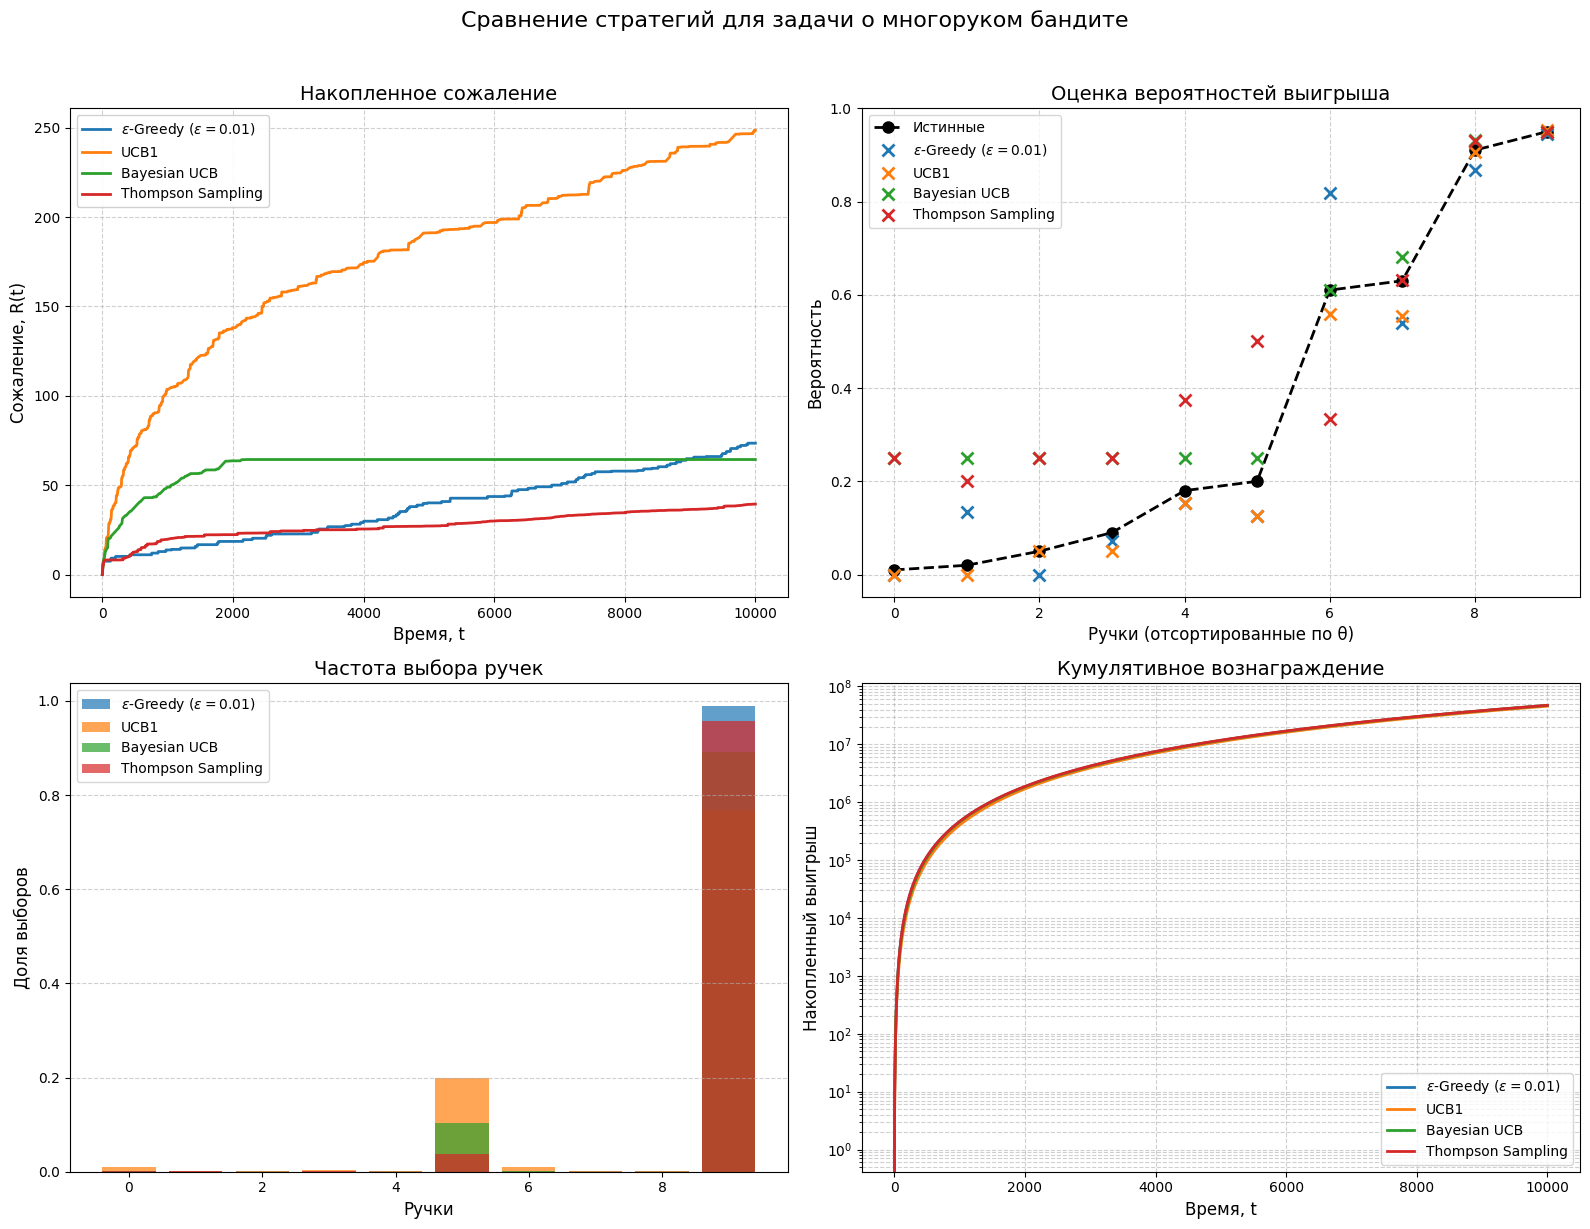

In [9]:
experiment(K = 10,
           N = 10_000,
           probas = [0.63, 0.2, 0.02, 0.18, 0.05, 0.91, 0.61, 0.01, 0.09, 0.95])